## Conceptos Clave en Calidad de Datos

Al evaluar la calidad de un dataset, existen tres dimensiones fundamentales que nos ayudan a diagnosticar su estado: **completitud**, **accuracy** y **consistencia**.

---

### Completitud (Completeness)

**¿Qué es?**  
La completitud mide si los datos **están presentes**. Es decir, verifica si hay valores faltantes (`NaN`, `null`, `NaT`) en las columnas o registros.

**Ejemplo:**  
Si una columna `fecha_transaccion` tiene 100 filas pero 10 están vacías, su completitud es del **90%**.

**Fórmula:**  

Completitud = (Total de valores no nulos/Total de registros) * 100


---

### Accuracy (Precisión o Exactitud)

**¿Qué es?**  
La accuracy se refiere a qué tan **correctos** son los valores con respecto a una fuente confiable o a un estándar esperado.

**Ejemplo:**  
Si en una columna `país` aparece un valor `USAA`, eso podría ser un error tipográfico. O si una edad es `-5`, eso indica una entrada inexacta.

**Nota:**  
En ausencia de una fuente externa, la accuracy puede medirse **por reglas internas**, como rangos válidos o valores permitidos.

---

### Consistencia (Consistency)

**¿Qué es?**  
La consistencia evalúa si los datos **son coherentes entre sí** dentro del dataset. Detecta contradicciones lógicas entre columnas o registros.

**Ejemplo:**  
- Si en `currency = "USD"` y `country = "Brazil"` constantemente, puede ser inconsistente si se espera `BRL` para ese país.  
- O si una `fecha_fin` ocurre **antes** de una `fecha_inicio`.

**Evaluación típica:**  
- Reglas de integridad entre campos (ej. `fecha_entrega` ≥ `fecha_envio`)
- Coherencia entre categorías relacionadas (ej. `estado` y `código postal`)

---

###  ¿Por qué importa?

Una mala calidad de datos afecta la precisión de los modelos, decisiones de negocio y análisis estadísticos.  
Por eso, **antes de entrenar modelos o construir reportes, siempre es crucial auditar la calidad de tus datos.**


## Tabla Resumen de Librerías Importadas

| Librería / Módulo                         | Propósito Principal                            | Ejemplo de Uso                                                   |
|-------------------------------------------|------------------------------------------------|------------------------------------------------------------------|
| `pandas` (`pd`)                           | Análisis y manipulación de datos tabulares     | `df = pd.read_csv('archivo.csv')`                               |
| `numpy` (`np`)                            | Operaciones matemáticas y generación de datos  | `np.random.normal(0, 1, 1000)`                                  |
| `datetime`, `timedelta`                   | Trabajar con fechas y horas                    | `datetime.now() + timedelta(days=3)`                            |
| `random`                                  | Generación de valores aleatorios               | `random.choice(['visa', 'mastercard'])`                         |
| `seaborn` (`sns`)                         | Visualización estadística avanzada             | `sns.heatmap(df.corr(), annot=True)`                            |
| `matplotlib.pyplot` (`plt`)               | Gráficos personalizados y básicos              | `plt.hist(df['amount'])`                                        |
| `sklearn.preprocessing.StandardScaler`    | Escalado de variables numéricas (normalización)| `X_scaled = scaler.fit_transform(X)`                            |

---

Estas librerías forman la base de la mayoría de proyectos de ciencia de datos, análisis exploratorio y machine learning en Python.


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# ---------- GENERACIÓN DE DATOS SINTÉTICOS ----------
def generate_synthetic_transactions(n=1000):
    np.random.seed(42)
    start_date = datetime(2025, 1, 1)
    timestamps = [start_date + timedelta(minutes=random.randint(0, 525600)) for _ in range(n)]

    data = {
        "transaction_id": [f"TX{i:05d}" for i in range(n)],
        "user_id": np.random.randint(1000, 1100, size=n),
        "timestamp": timestamps,
        "amount": np.round(np.random.exponential(scale=50, size=n), 2), #Genera n números aleatorios a partir de una distribución exponencial con parámetro scale=50
        "merchant": np.random.choice(['Amazon', 'Walmart', 'Apple', 'Starbucks', 'Target', 'eBay', 'Netflix'], size=n),
        "country": np.random.choice(['USA', 'CAN', 'MEX', 'BRA', 'ESP', 'DEU'], size=n),
        "currency": np.random.choice(['USD', 'CAD', 'MXN', 'BRL', 'EUR'], size=n),
        "is_fraud": np.random.choice([0, 1], size=n, p=[0.95, 0.05])
    }

    df = pd.DataFrame(data)

    # Introducir valores faltantes aleatorios
    for col in ['merchant', 'country', 'currency']:
        df.loc[df.sample(frac=0.05).index, col] = np.nan

    # Introducir inconsistencias
    df.loc[df.sample(frac=0.01).index, 'currency'] = 'INVALID'
    df.loc[df.sample(frac=0.01).index, 'country'] = 'UNKNOWN'

    # Introducir inexactitudes
    df.loc[df.sample(frac=0.01).index, 'amount'] = 0

    # Dejar un 10% con amount y timestamp nulos
    null_indices = df.sample(frac=0.10, random_state=42).index
    df.loc[null_indices, ['amount', 'timestamp']] = np.nan

    return df

In [3]:
# ---------- ANÁLISIS EXPLORATORIO ----------

def exploratory_analysis(df):
    # Configurar estilo
    sns.set(style="whitegrid")

    # 1. Distribución de montos
    plt.figure(figsize=(8, 4))
    sns.histplot(df['amount'].dropna(), bins=50, kde=True)
    plt.title("Distribución de montos")
    plt.xlabel("Monto")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

    # 2. Conteo por país
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x='country', order=df['country'].value_counts().index)
    plt.title("Transacciones por país")
    plt.xlabel("País")
    plt.ylabel("Conteo")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 3. Conteo por comerciante
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x='merchant', order=df['merchant'].value_counts().index)
    plt.title("Transacciones por comerciante")
    plt.xlabel("Comerciante")
    plt.ylabel("Conteo")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 4. Montos por clase de fraude
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='is_fraud', y='amount')
    plt.title("Montos por clase de fraude")
    plt.xlabel("¿Es fraude?")
    plt.ylabel("Monto")
    plt.tight_layout()
    plt.show()

    # 5. Conteo de fraudes
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='is_fraud')
    plt.title("Frecuencia de transacciones fraudulentas")
    plt.xlabel("¿Es fraude?")
    plt.ylabel("Conteo")
    plt.tight_layout()
    plt.show()

   # MATRIZ DE CORRELACIÓN EXCLUYENDO user_id
    df_corr = df.drop(columns=['user_id'])
    plt.figure(figsize=(8, 6))
    corr = df_corr.select_dtypes(include=[np.number]).corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title("Matriz de correlación (sin user_id)")
    plt.tight_layout()
    plt.show()


In [4]:
# ---------- ANÁLISIS DE CALIDAD DE DATOS ----------

def data_quality_report(df):
    report = []
    for col in df.columns:
        total = len(df)
        nulls = df[col].isnull().sum()
        completeness = 1 - nulls / total

        # Accuracy personalizada por columna
        if col == 'currency':
            valid_values = ['USD', 'CAD', 'MXN', 'BRL', 'EUR']
            accuracy = df[col].isin(valid_values).mean()
        elif col == 'country':
            valid_values = ['USA', 'CAN', 'MEX', 'BRA', 'ESP', 'DEU']
            accuracy = df[col].isin(valid_values).mean()
        elif col == 'amount':
            accuracy = (df[col] > 0).mean()
        else:
            accuracy = np.nan  # No aplica o sin criterio claro

        # Consistencia: tipo de dato correcto
        expected_type = df[col].dropna().map(type).mode()[0]
        consistency = df[col].dropna().map(type).eq(expected_type).mean()

        report.append({
            'columna': col,
            'completitud': round(completeness, 3),
            'accuracy': round(accuracy, 3) if not np.isnan(accuracy) else 'N/A',
            'consistencia': round(consistency, 3)
        })

    return pd.DataFrame(report)

In [5]:
# ---------- EJECUCIÓN ----------
df = generate_synthetic_transactions()
print("\nPrimeras filas del dataset generado:")
print(df.head())


Primeras filas del dataset generado:
  transaction_id  user_id           timestamp  amount merchant country  \
0        TX00000     1051 2025-02-21 09:19:00   44.20  Walmart     DEU   
1        TX00001     1092 2025-02-27 03:34:00   68.41   Target     USA   
2        TX00002     1014 2025-07-14 09:35:00    0.00  Walmart     USA   
3        TX00003     1071 2025-03-08 09:00:00    6.82   Amazon     BRA   
4        TX00004     1060 2025-02-12 00:32:00   16.69   Target     USA   

  currency  is_fraud  
0      EUR         0  
1      EUR         0  
2      BRL         0  
3      CAD         0  
4      NaN         0  



Generando gráficos exploratorios...


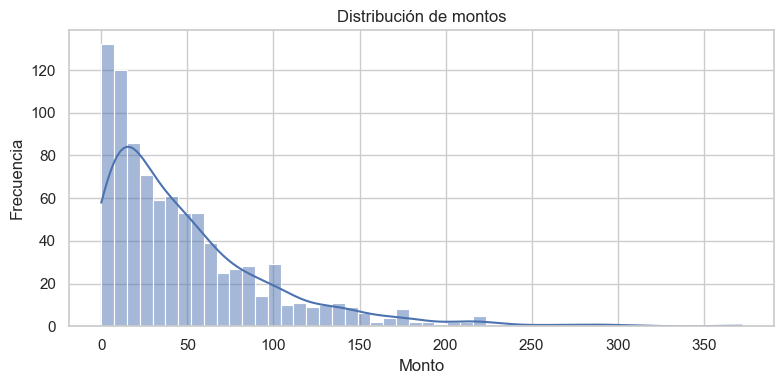

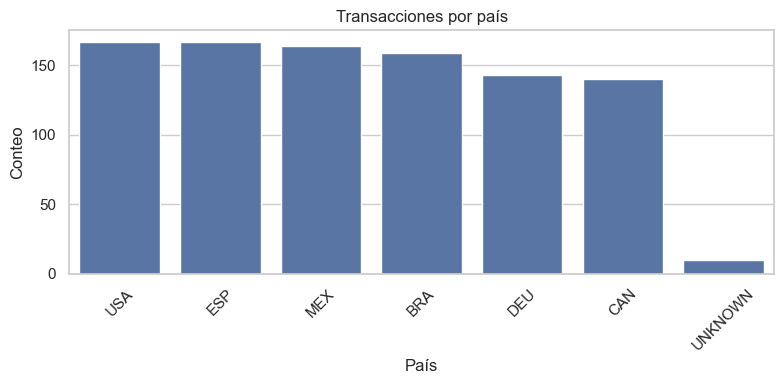

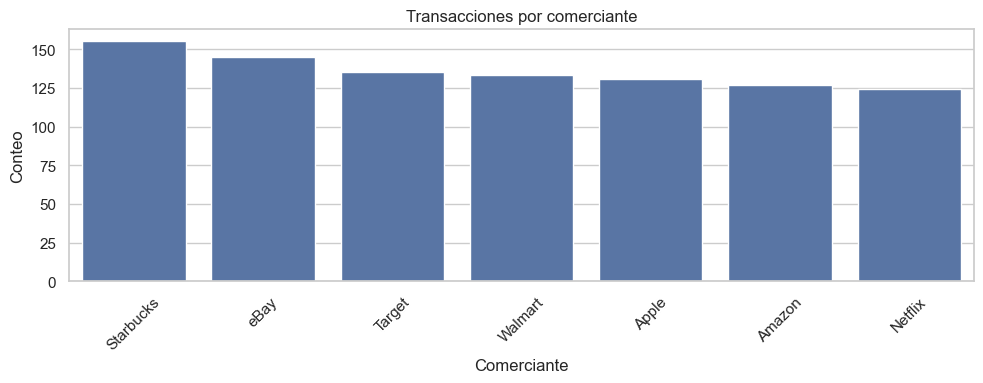

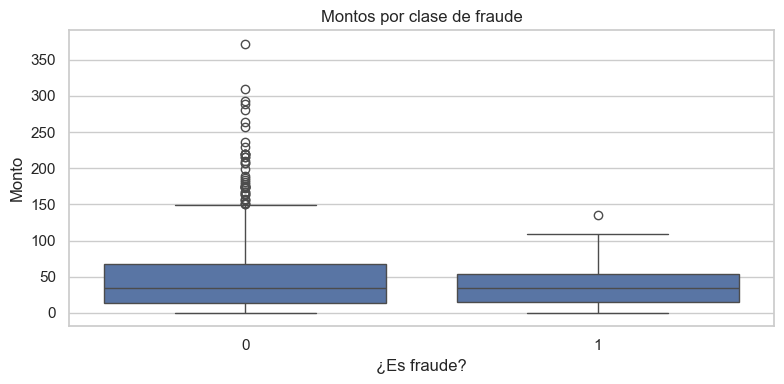

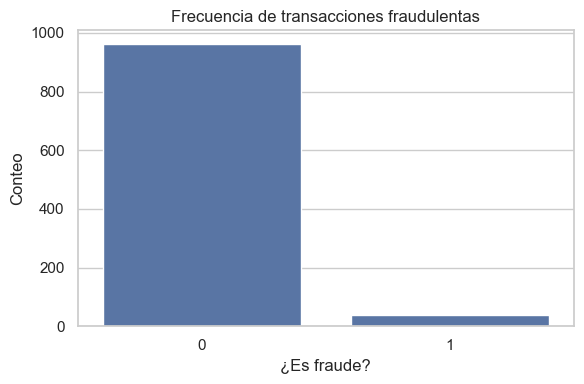

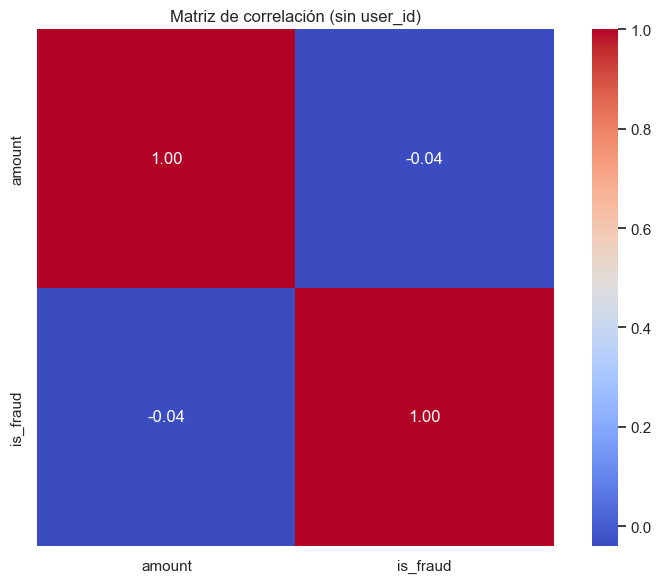

In [6]:
print("\nGenerando gráficos exploratorios...")
exploratory_analysis(df)

In [7]:
print("\nReporte de Calidad de Datos:")
quality_df = data_quality_report(df)
print(quality_df.to_string(index=False))


Reporte de Calidad de Datos:
       columna  completitud accuracy  consistencia
transaction_id        1.000      N/A           1.0
       user_id        1.000      N/A           1.0
     timestamp        0.900      N/A           1.0
        amount        0.900    0.891           1.0
      merchant        0.950      N/A           1.0
       country        0.950     0.94           1.0
      currency        0.952    0.942           1.0
      is_fraud        1.000      N/A           1.0


In [8]:
def set_multi_index(df):
    df_new = df.copy()
    df_new.set_index(['user_id', 'transaction_id'], inplace=True)
    return df_new

In [9]:
df_with_multiindex = set_multi_index(df)
print(df_with_multiindex.head())

                                 timestamp  amount merchant country currency  \
user_id transaction_id                                                         
1051    TX00000        2025-02-21 09:19:00   44.20  Walmart     DEU      EUR   
1092    TX00001        2025-02-27 03:34:00   68.41   Target     USA      EUR   
1014    TX00002        2025-07-14 09:35:00    0.00  Walmart     USA      BRL   
1071    TX00003        2025-03-08 09:00:00    6.82   Amazon     BRA      CAD   
1060    TX00004        2025-02-12 00:32:00   16.69   Target     USA      NaN   

                        is_fraud  
user_id transaction_id            
1051    TX00000                0  
1092    TX00001                0  
1014    TX00002                0  
1071    TX00003                0  
1060    TX00004                0  


In [10]:
def impute_and_transform(df):
    df_filled = df.copy()

    # Imputar columnas numéricas con la media
    num_cols = df_filled.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        mean_value = df_filled[col].mean()
        df_filled[col] = df_filled[col].fillna(mean_value)

    # Imputar columna timestamp con la fecha más reciente
    if 'timestamp' in df_filled.columns:
        max_date = df_filled['timestamp'].max()
        df_filled['timestamp'] = df_filled['timestamp'].fillna(max_date)

    # Imputar categóricas con la moda
    cat_cols = ['merchant', 'country', 'currency']
    for col in cat_cols:
        if col in df_filled.columns:
            mode_value = df_filled[col].mode(dropna=True)[0]
            df_filled[col] = df_filled[col].fillna(mode_value)

    # Conversión a USD
    conversion_rates = {
        'USD': 1.00,
        'CAD': 0.75,
        'MXN': 0.058,
        'BRL': 0.19,
        'EUR': 1.10
    }
    df_filled['amount_usd'] = df_filled.apply(
        lambda row: row['amount'] * conversion_rates.get(row['currency'], 1.00),
        axis=1
    )

    # Escalado del amount en USD
    scaler = StandardScaler()
    df_filled['amount_usd_scaled'] = scaler.fit_transform(df_filled[['amount_usd']])

    #crear columna hora
    df_filled['hour'] = df_filled['timestamp'].dt.hour.astype(str).str.zfill(2)

    # Crear columna con día de la semana en español abreviado
    dias_semana = ['lun', 'mar', 'mie', 'jue', 'vie', 'sab', 'dom']
    df_filled['dia_semana'] = df_filled['timestamp'].dt.weekday.map(lambda x: dias_semana[x])

    # Eliminar columnas
    df_filled.drop(columns=['amount','amount_usd', 'currency', 'timestamp'], inplace=True)


    # Especificar columnas categóricas a transformar
    categorical_cols = ['merchant', 'country', 'hour', 'dia_semana']

    # Aplicar one-hot encoding y eliminar columnas originales
    df_filled = pd.get_dummies(df_filled, columns=categorical_cols, drop_first=False)


    return df_filled

In [11]:
df_imputed = impute_and_transform(df_with_multiindex)
print("\nDatos con valores faltantes imputados:")
print(df_imputed.head())


Datos con valores faltantes imputados:
                        is_fraud  amount_usd_scaled  merchant_Amazon  \
user_id transaction_id                                                 
1051    TX00000                0           0.481478            False   
1092    TX00001                0           1.146307            False   
1014    TX00002                0          -0.732297            False   
1071    TX00003                0          -0.604603             True   
1060    TX00004                0          -0.708131            False   

                        merchant_Apple  merchant_Netflix  merchant_Starbucks  \
user_id transaction_id                                                         
1051    TX00000                  False             False               False   
1092    TX00001                  False             False               False   
1014    TX00002                  False             False               False   
1071    TX00003                  False             Fals

In [12]:
print("\nReporte de Calidad de Datos:")
quality_df_imputed = data_quality_report(df_imputed)
print(quality_df_imputed.to_string(index=False))


Reporte de Calidad de Datos:
           columna  completitud accuracy  consistencia
          is_fraud          1.0      N/A           1.0
 amount_usd_scaled          1.0      N/A           1.0
   merchant_Amazon          1.0      N/A           1.0
    merchant_Apple          1.0      N/A           1.0
  merchant_Netflix          1.0      N/A           1.0
merchant_Starbucks          1.0      N/A           1.0
   merchant_Target          1.0      N/A           1.0
  merchant_Walmart          1.0      N/A           1.0
     merchant_eBay          1.0      N/A           1.0
       country_BRA          1.0      N/A           1.0
       country_CAN          1.0      N/A           1.0
       country_DEU          1.0      N/A           1.0
       country_ESP          1.0      N/A           1.0
       country_MEX          1.0      N/A           1.0
   country_UNKNOWN          1.0      N/A           1.0
       country_USA          1.0      N/A           1.0
           hour_00          1.0    

In [13]:
df_imputed.head()

,,is_fraud,amount_usd_scaled,merchant_Amazon,merchant_Apple,merchant_Netflix,merchant_Starbucks,merchant_Target,merchant_Walmart,merchant_eBay,country_BRA,...,hour_21,hour_22,hour_23,dia_semana_dom,dia_semana_jue,dia_semana_lun,dia_semana_mar,dia_semana_mie,dia_semana_sab,dia_semana_vie
user_id,transaction_id,,,,,,,,,,,,,,,,,,,,,
1051,TX00000,0,0.481478,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1092,TX00001,0,1.146307,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1014,TX00002,0,-0.732297,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1071,TX00003,0,-0.604603,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1060,TX00004,0,-0.708131,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
